In [31]:
import json, sys, random
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [3]:
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt

In [12]:
with open(r'../input/ships-in-satellite-imagery/shipsnet.json') as f:
    dataset = json.load(f)


In [38]:
#dataset['labels']

In [36]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [14]:
input_data.shape

(4000, 19200)

In [17]:
colors=3
width=80
height=80
X=input_data.reshape([-1,colors,width,height])
print(X.shape)
X[2].shape

(4000, 3, 80, 80)


(3, 80, 80)

In [24]:
im=X[0]
r=im[0]
g=im[1]
b=im[2]


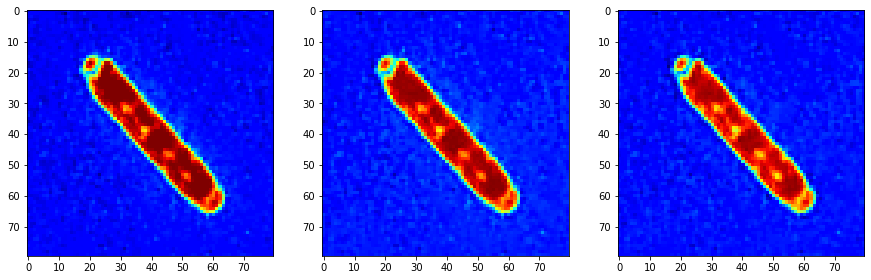

In [28]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(r)

plt.subplot(1, 3, 2)
plt.imshow(g)

plt.subplot(1, 3, 3)
plt.imshow(b)
    
plt.show()

In [33]:
y =tf.keras.utils.to_categorical(output_data, 2)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [39]:
indexes = np.arange(2800)
np.random.shuffle(indexes)
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]
X_train = X_train / 255

In [40]:
np.random.seed(42)

In [51]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(80,80,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    
    tf.keras.layers.Dense(2,activation='softmax')
    
])

In [54]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
70/70 - 10s - loss: 0.4041 - accuracy: 0.8076 - val_loss: 0.1538 - val_accuracy: 0.9446
Epoch 2/18
70/70 - 10s - loss: 0.1701 - accuracy: 0.9415 - val_loss: 0.1160 - val_accuracy: 0.9643
Epoch 3/18
70/70 - 10s - loss: 0.1198 - accuracy: 0.9567 - val_loss: 0.0875 - val_accuracy: 0.9679
Epoch 4/18
70/70 - 10s - loss: 0.1002 - accuracy: 0.9647 - val_loss: 0.0466 - val_accuracy: 0.9857
Epoch 5/18
70/70 - 10s - loss: 0.0676 - accuracy: 0.9737 - val_loss: 0.0257 - val_accuracy: 0.9929
Epoch 6/18
70/70 - 10s - loss: 0.0717 - accuracy: 0.9786 - val_loss: 0.0446 - val_accuracy: 0.9821
Epoch 7/18
70/70 - 10s - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 8/18
70/70 - 10s - loss: 0.0501 - accuracy: 0.9821 - val_loss: 0.0575 - val_accuracy: 0.9786
Epoch 9/18
70/70 - 10s - loss: 0.0443 - accuracy: 0.9871 - val_loss: 0.0213 - val_accuracy: 0.9929
Epoch 10/18
70/70 - 10s - loss: 0.0310 - accuracy: 0.9888 - val_loss: 0.0230 - val_accuracy: 0.9929
Epoch 11/

In [58]:
image = Image.open('../input/ships-img/lb_1.png')
img = image.load()

In [61]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [62]:
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [63]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

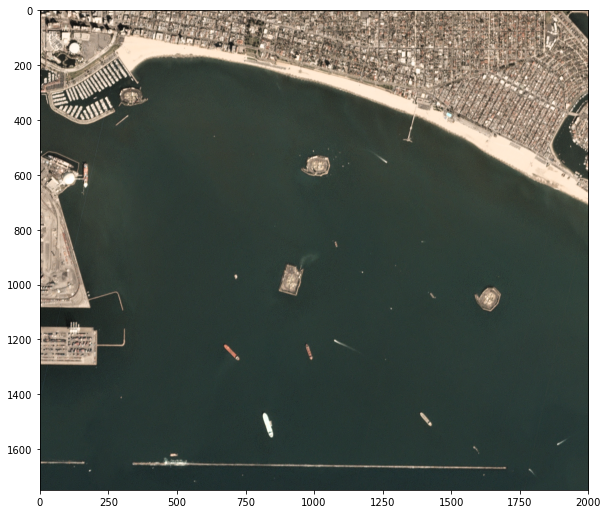

In [64]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [65]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [66]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [67]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [68]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:280 Y:270  [[0.00154191 0.99845815]]


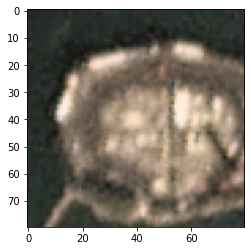

X:1310 Y:390  [[0.00372914 0.9962709 ]]


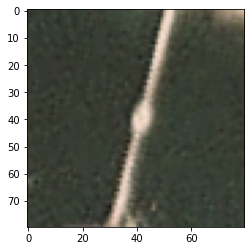

X:960 Y:520  [[0.00747007 0.9925299 ]]


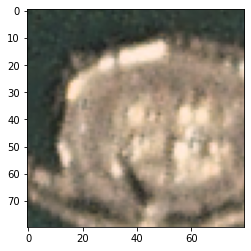

X:1590 Y:1000  [[0.05013673 0.94986326]]


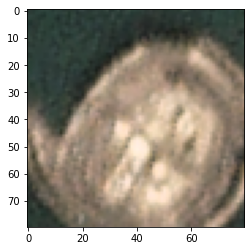

X:250 Y:1020  [[0.00793113 0.9920689 ]]


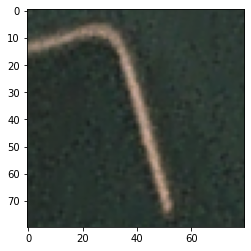

X:650 Y:1200  [[9.9281686e-05 9.9990070e-01]]


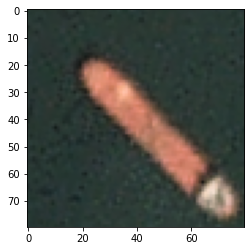

X:940 Y:1200  [[0.06378896 0.936211  ]]


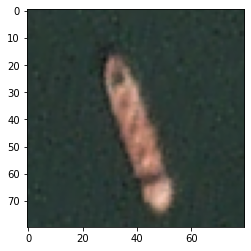

X:1360 Y:1450  [[2.3436388e-04 9.9976569e-01]]


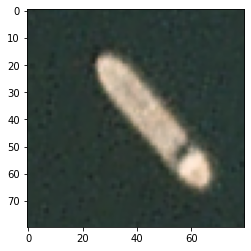

X:780 Y:1460   [[0.00681829 0.99318165]]


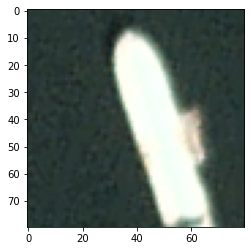

X:440 Y:1590  [[0.09906955 0.9009304 ]]


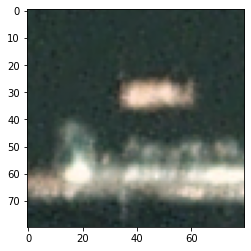

X:950 Y:1620  [[0.06947089 0.93052906]]


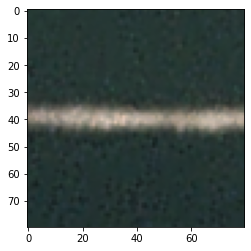

X:1920 Y:1660  

In [69]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [70]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [71]:
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1749, 2001, 3)

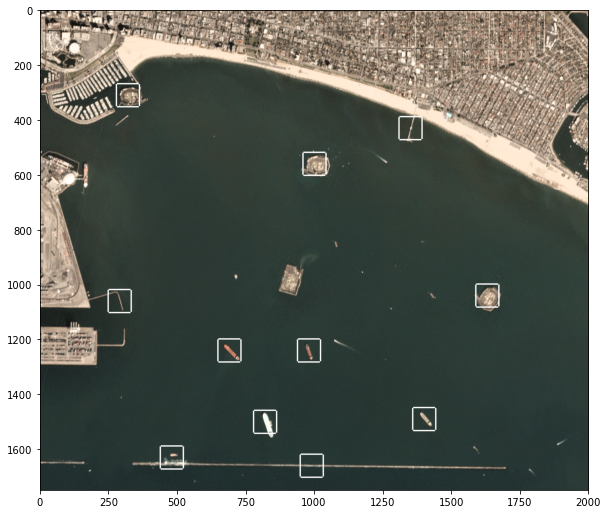

In [72]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()